# Nivell 1

## Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 3/tips.csv')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [25]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
total_pay     0
dtype: int64

In [5]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [6]:
print(tips.shape)
print(tips.ndim)

(244, 7)
2


In [11]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In this exercise we will develop the next questions:
* who pay more in a restaurant, males or females? and tips?
* Are there some preferent days for every gender to go to restaurant?
* When the people smoke more, dinner or lunch?
* Which day the people pay more?
* Are there a relationship between tips and total_pay

First, I need to do a column with the total pay.

In [10]:
tips['total_pay']=tips['total_bill']+tips['tip']

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_pay
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


First question, who pay more in a restaurant, males or females? For answer this question the first step is know the proportion of males and females.

In [40]:
#proportions:
print('male proportion:')
propMales = tips['sex'][tips['sex']=='Male'].count()/244
print(propMales*100)

print('female proportion:')
propFemales = tips['sex'][tips['sex']=='Female'].count()/244
print(propFemales*100)

male proportion:
64.34426229508196
female proportion:
35.65573770491803


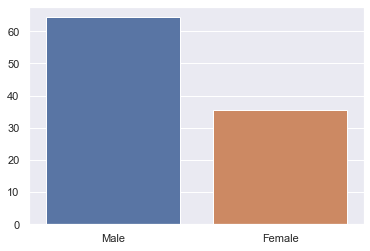

In [80]:
sns.set()
sns.barplot(x=['Male','Female'], y=[propMales*100, propFemales*100])
plt.show()

If both gender spend the same money, I'll hope the proportion quantity by group:

In [41]:
#proportion by sex
print('Expected spend in males')
print(tips['total_pay'].sum()*propMales)
print('Expected spend in females')
print(tips['total_pay'].sum()*propFemales)

Expected spend in males
3577.1227459016395
Expected spend in females
1982.2272540983608


In [42]:
#Pay_total between sex:
print('males:')
print(tips[tips['sex']== 'Male']['total_pay'].sum())
print('females:')
print(tips[tips['sex']== 'Female']['total_pay'].sum())

males:
3741.89
females:
1817.46


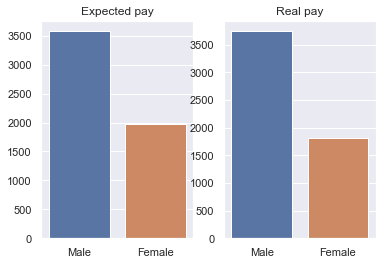

In [93]:
sns.set()
#Expected
plt.subplot(1,2,1)
sns.barplot(x=['Male','Female'], y=[tips['total_pay'].sum()*propMales, tips['total_pay'].sum()*propFemales])
plt.title('Expected pay')


#Real
plt.subplot(1,2,2)
sns.barplot(x=['Male','Female'], y=[tips[tips['sex']== 'Male']['total_pay'].sum(),
                                    tips[tips['sex']== 'Female']['total_pay'].sum()])
plt.title('Real pay')

plt.show()
                                    
                                    

I' suppose that there are not difference in pay between gender. Although, for more confidence, a statistic test would be a good tool to reaffirm the supposition.

Now, I want know if it is the same with tips.

In [44]:
#Pay expected tips by sex
print('Expected tips in males')
print(tips['tip'].sum()*propMales)
print('Expected tips in females')
print(tips['tip'].sum()*propFemales)

Expected tips in males
470.7297540983606
Expected tips in females
260.8502459016393


In [45]:
#Pay  tips between sex:
print('males:')
print(tips[tips['sex']== 'Male']['tip'].sum())
print('females:')
print(tips[tips['sex']== 'Female']['tip'].sum())

males:
485.07
females:
246.50999999999996


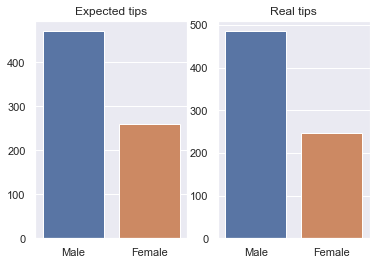

In [94]:
sns.set()
#Expected
plt.subplot(1,2,1)
sns.barplot(x=['Male','Female'], y=[tips['tip'].sum()*propMales, tips['tip'].sum()*propFemales])
plt.title('Expected tips')


#Real
plt.subplot(1,2,2)
sns.barplot(x=['Male','Female'], y=[tips[tips['sex']== 'Male']['tip'].sum(),
                                    tips[tips['sex']== 'Female']['tip'].sum()])
plt.title('Real tips')

plt.show()

Other time, there are little difference between gender in relation with tips. Although, like the previous case, it would need statistic test.

Now, we are going to test if there are some preferent days for every gender to go to restaurant.

In [47]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'total_pay'],
      dtype='object')

In [51]:
days_sex= pd.crosstab(tips['sex'], tips['day'], margins=True)
days_sex

day,Fri,Sat,Sun,Thur,All
sex,,,,,
Female,9,28,18,32,87
Male,10,59,58,30,157
All,19,87,76,62,244


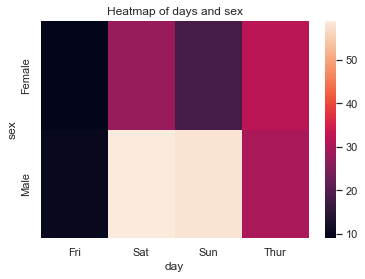

In [98]:
days_sex2= pd.crosstab(tips['sex'], tips['day'])
sns.heatmap(data=days_sex2)
plt.title('Heatmap of days and sex')
plt.show()

How we could hope, as the proportion of men are bigger than women, the visits are different. However, Thursday are practically the same. On the other hand, remember that now we are working with absolut values.
However, it seems that men are more frequently in a bar that women. But, for comparate this afirmation, we need to use statistics test.

When the people smoke more, dinner or lunch?

In [4]:
pd.crosstab(tips['smoker'], tips['time'], margins=True)

time,Dinner,Lunch,All
smoker,,,
No,106,45,151
Yes,70,23,93
All,176,68,244


During the dinner the number of smokers is bigger

__Which day the people pay more?__

In [12]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

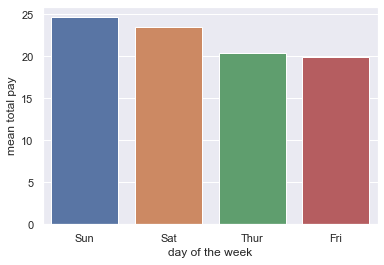

In [23]:
days=['Sun', 'Sat', 'Thur', 'Fri']
y=[]
for day in days:
    y.append(tips[tips['day']==day]['total_pay'].mean())
sns.set()
sns.barplot(x=days,y=y)
plt.ylabel('mean total pay')
plt.xlabel('day of the week')
plt.show()

When the people expend more money is Sunday.

__Are there a relationship between tips and total_pay__

In [24]:
tips.describe()

,total_bill,tip,size,total_pay
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,22.784221
std,8.902412,1.383638,0.951100,9.890116
min,3.070000,1.000000,1.000000,4.070000
25%,13.347500,2.000000,2.000000,15.475000
50%,17.795000,2.900000,2.000000,20.600000
75%,24.127500,3.562500,3.000000,27.722500
max,50.810000,10.000000,6.000000,60.810000


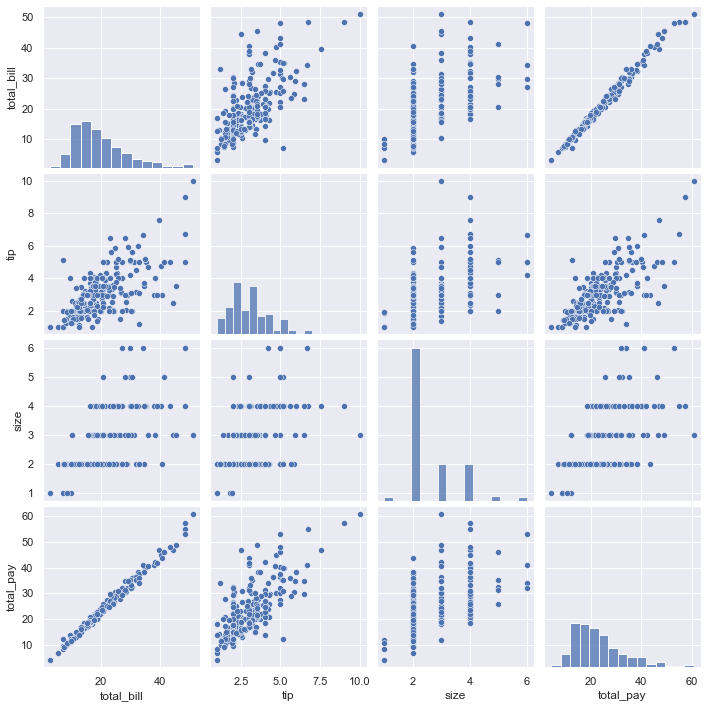

In [25]:
sns.pairplot(tips)

Here we can see differente relationship between variables. In general, when the pay is bigger are also tips and size.

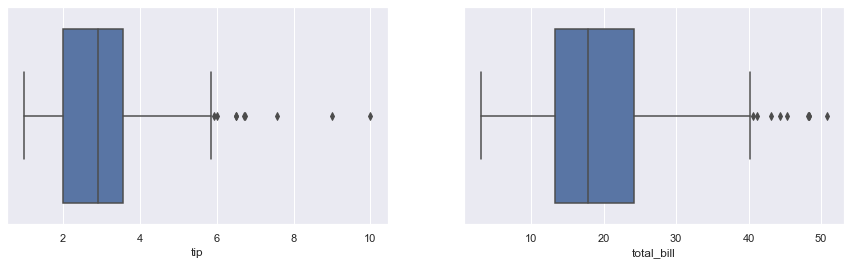

In [36]:
fig = plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data=tips, x='tip')
plt.subplot(1,2,2)
sns.boxplot(data=tips, x='total_bill')
plt.show()

We can see that there are some outliers in both graphics. Moreover, the distribution between bills and tips are different because 3th quartile is lower in tips than bills. 

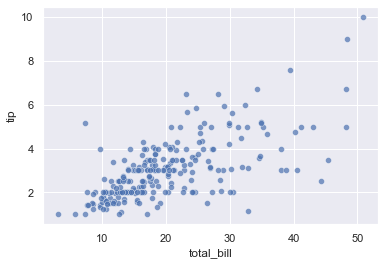

In [41]:
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.7)
plt.show()

As we saw in pair plots, there are a lineal relationship between tips and bill.

# Atenció exercici incomplet i per tant no cal corregir-lo. Si tinc temps ja el faré més endavant

# Nivell 2

## Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat 

In [3]:
#movies = pd.read_table('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 3/movies.dat', sep='::')
movies = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat", 
                     sep="::", header=None, usecols=[1, 2], names = ['title(year)', 'genre'], encoding="iso-8859-1")

In [5]:
movies.head()

,title(year),genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [6]:
print(movies.shape)
print(movies.ndim)


(3883, 2)
2


In [7]:
movies.genre.nunique()

301

In [8]:
movies.columns

Index(['title(year)', 'genre'], dtype='object')

In [4]:
genres = movies['genre']

In [10]:
genres.head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genre, dtype: object

In [11]:
type(genres)

pandas.core.series.Series

In [12]:
genres.explode()

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: genre, Length: 3883, dtype: object

In [23]:
genres.value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genre, Length: 301, dtype: int64

In [19]:
genres2 = pd.get_dummies(data=genres, prefix_sep='|', dummy_na=False,
                        drop_first=False, )
#Con str que es como dice https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html
#aquí da error
genres2.head()

,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


pd.get_dummies don't do well the name's columns, so I am going to do manually throught a function

In [7]:
#Save the name of columns
names = genres2.columns

In [22]:
#Check type data
print(type(names))
print(names.shape)

<class 'pandas.core.indexes.base.Index'>
(301,)


In [23]:
#transform names in a list
names2 = names.values.tolist()

In [24]:
print(type(names2))
print(len(names2))

<class 'list'>
301


In [25]:
#Function where save the names of different genres


listNames = []
for name in names2:
    saveName=name.split(sep='|')
    for name2 in saveName:
        if name2 not in listNames:
            listNames.append(name2)
            
            
print(len(listNames))
print(listNames)

18
['Action', 'Adventure', 'Animation', "Children's", 'Fantasy', 'Horror', 'Sci-Fi', 'Comedy', 'Crime', 'Romance', 'War', 'Drama', 'Thriller', 'Mystery', 'Western', 'Musical', 'Film-Noir', 'Documentary']


In [4]:
dummy_genre = movies.genre.str.get_dummies(sep='|')#Preguntar porqueu esto funciona--> es el nombre de la función, mirar https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html
dummy_genre.head()

#genres2 = pd.str.get_dummies(data=genres, prefix_sep='|', dummy_na=False,
#                        drop_first=False, columns=listNames, 
#                         )
#dummy_df = df.GENERES.str.get_dummies(sep='|')
#dummy_df.tail(2)
#genres2.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
movies.genre = movies['genre'].str.split()
movies.head()

,title(year),genre
0,Toy Story (1995),[Animation|Children's|Comedy]
1,Jumanji (1995),[Adventure|Children's|Fantasy]
2,Grumpier Old Men (1995),[Comedy|Romance]
3,Waiting to Exhale (1995),[Comedy|Drama]
4,Father of the Bride Part II (1995),[Comedy]


In [23]:
movies2 = movies.copy()

In [25]:

movies2.genre = movies2['genre'].apply(lambda x: x.split(sep='|'))

In [26]:
movies2.head()

,title(year),genre
0,Toy Story (1995),"[Animation, Children's, Comedy]"
1,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Comedy, Drama]"
4,Father of the Bride Part II (1995),[Comedy]


In [24]:
#This optino work, but it is not usefull
movies3=movies2['genre'].str.split(pat='|',expand=True)#Aquí lo he hecho con la versión que el separador es | y no coma
movies3.head()

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [10]:
#Changing in format list
genre2 = movies2['genre'].tolist()
type(genre2)
print(genre2[0:10])
df_genre2 = 

[['Animation', "Children's", 'Comedy'], ['Adventure', "Children's", 'Fantasy'], ['Comedy', 'Romance'], ['Comedy', 'Drama'], ['Comedy'], ['Action', 'Crime', 'Thriller'], ['Comedy', 'Romance'], ['Adventure', "Children's"], ['Action'], ['Action', 'Adventure', 'Thriller']]


In [33]:
movies.iloc[2]


title(year)    Grumpier Old Men (1995)
genre                   Comedy|Romance
Name: 2, dtype: object

In [6]:
#Separate year and movie's name
mov_names = movies['title(year)']
mov_names.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title(year), dtype: object

In [18]:
type(movies.iloc[0,0])

str

In [5]:
#apply separate the title and year
movies['year'] = movies['title(year)'].apply(lambda x: x.split())
movies.head()

,title(year),genre,year
0,Toy Story (1995),Animation|Children's|Comedy,"[Toy, Story, (1995)]"
1,Jumanji (1995),Adventure|Children's|Fantasy,"[Jumanji, (1995)]"
2,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier, Old, Men, (1995)]"
3,Waiting to Exhale (1995),Comedy|Drama,"[Waiting, to, Exhale, (1995)]"
4,Father of the Bride Part II (1995),Comedy,"[Father, of, the, Bride, Part, II, (1995)]"


In [6]:
#take the last element, which is the year with parentesis as a string
movies['year2']=movies['year'].apply(lambda x: x[-1])
movies.head()

,title(year),genre,year,year2
0,Toy Story (1995),Animation|Children's|Comedy,"[Toy, Story, (1995)]",(1995)
1,Jumanji (1995),Adventure|Children's|Fantasy,"[Jumanji, (1995)]",(1995)
2,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier, Old, Men, (1995)]",(1995)
3,Waiting to Exhale (1995),Comedy|Drama,"[Waiting, to, Exhale, (1995)]",(1995)
4,Father of the Bride Part II (1995),Comedy,"[Father, of, the, Bride, Part, II, (1995)]",(1995)


In [7]:
type(movies.year2[0])

str

In [8]:
movies['year3']=movies['year2'].apply(lambda x: int(x[1:5]))
movies.head()

#function to take the year as int
#def any_peli(x):
#    index = x.find('(')
#    year = int(x[1:5])
#    return year

ValueError: invalid literal for int() with base 10: "L'As"

In [9]:
#Como da error hare una función que busque el año y lo guarde para evitar el error

#function to take the year as int
def any_peli(x):
    for element in x:
        if element.find('(') != -1:
            index = element.find('(')
            year = element[1:5]
    return year

movies['year3'] = movies['year'].apply(lambda x: any_peli(x))
movies.head()

#Com no permet passar directament a int es busca el problema (mostat a continuació) ja que dona el mateix error que abans

,title(year),genre,year,year2,year3
0,Toy Story (1995),Animation|Children's|Comedy,"[Toy, Story, (1995)]",(1995),1995
1,Jumanji (1995),Adventure|Children's|Fantasy,"[Jumanji, (1995)]",(1995),1995
2,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier, Old, Men, (1995)]",(1995),1995
3,Waiting to Exhale (1995),Comedy|Drama,"[Waiting, to, Exhale, (1995)]",(1995),1995
4,Father of the Bride Part II (1995),Comedy,"[Father, of, the, Bride, Part, II, (1995)]",(1995),1995


In [10]:
movies.year3 = movies.year3.apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: "L'As"

In [11]:
movies[movies['year3']=="L'As"]

,title(year),genre,year,year2,year3
988,"Associate, The (L'Associe)(1982)",Comedy,"[Associate,, The, (L'Associe)(1982)]",(L'Associe)(1982),L'As


In [12]:
movies.at[988, 'year3']=1982
#movies.iat[988, 4]

In [13]:
#Comprobamos que el valor es correcto
movies.iloc[988]

title(year)        Associate, The (L'Associe)(1982)
genre                                        Comedy
year           [Associate,, The, (L'Associe)(1982)]
year2                             (L'Associe)(1982)
year3                                          1982
Name: 988, dtype: object

In [14]:
#Transformamos todos los años a int
movies['year3'] = movies.year3.apply(lambda x: int(x))

In [15]:
movies.head()

,title(year),genre,year,year2,year3
0,Toy Story (1995),Animation|Children's|Comedy,"[Toy, Story, (1995)]",(1995),1995
1,Jumanji (1995),Adventure|Children's|Fantasy,"[Jumanji, (1995)]",(1995),1995
2,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier, Old, Men, (1995)]",(1995),1995
3,Waiting to Exhale (1995),Comedy|Drama,"[Waiting, to, Exhale, (1995)]",(1995),1995
4,Father of the Bride Part II (1995),Comedy,"[Father, of, the, Bride, Part, II, (1995)]",(1995),1995


In [16]:
#limpiamos el dataframem y unimos
moviesDef = movies.filter(items=['title(year)', 'year3'], axis=1)
moviesDef.head()

,title(year),year3
0,Toy Story (1995),1995
1,Jumanji (1995),1995
2,Grumpier Old Men (1995),1995
3,Waiting to Exhale (1995),1995
4,Father of the Bride Part II (1995),1995


In [17]:
moviesDef=moviesDef.join(dummy_genre)
moviesDef.head()

,title(year),year3,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale (1995),1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II (1995),1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
y=dummy_genre.sum(axis=0)
type(y)
y.shape
y

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

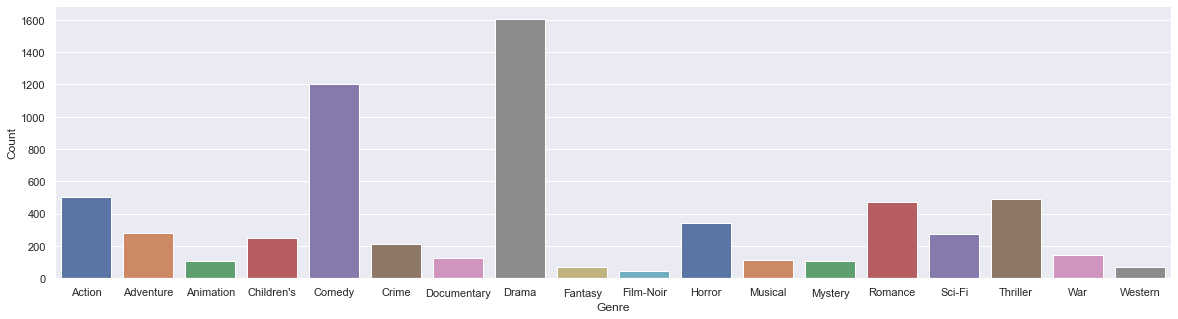

In [25]:
sns.set()
sns.barplot(x=dummy_genre.columns, y=y, palette='deep')
plt.rcParams['figure.figsize'] = [20, 5]
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

The barplots shows the different genre. Along the years, the most habitual genre is drama follow for comedy. Between the rest there are not a lot of differences.

Now, it will show the progression for different years

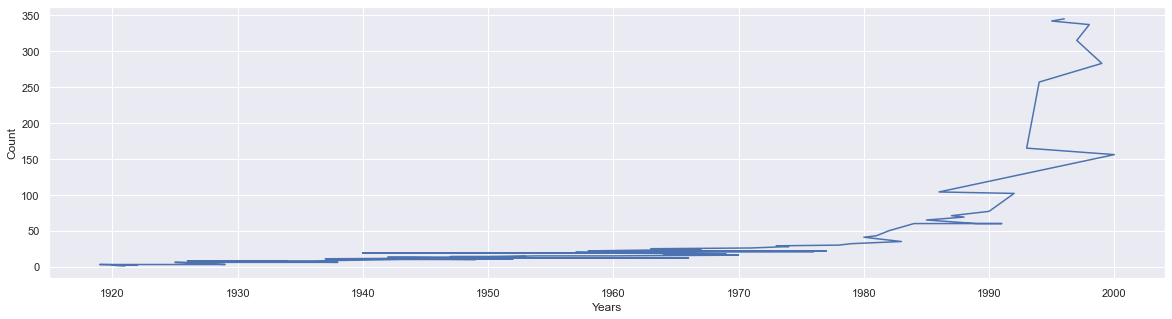

In [75]:
serie = moviesDef.year3.value_counts()
plt.plot(serie)
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

(81,)
(81,)


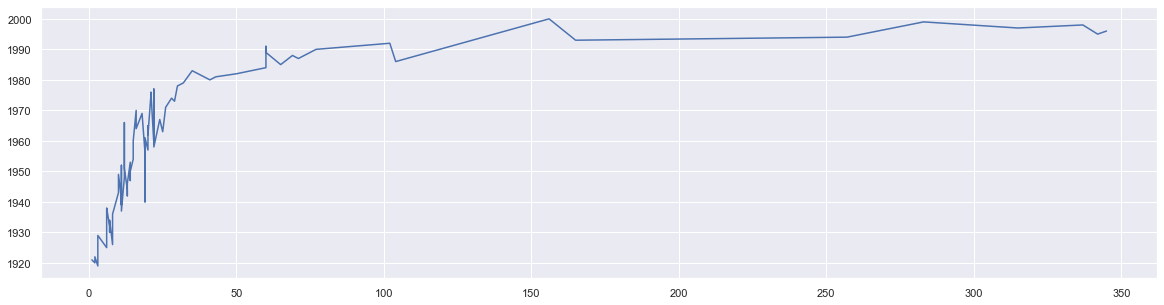

In [94]:
#The plot is wrong, I search the cause
yars= serie.index[:]
yars.sort_values()
print(yars.shape)
print(serie.shape)
plt.plot(serie, yars)

In [38]:
#Intento ordenar los años porque en el barplot el orden es el número de películas.  
a= moviesDef.year3.sort_values(ascending=True)
print(a.head())
print(a.shape)
print(type(a))

3063    1919
2754    1919
2752    1919
3240    1920
3162    1920
Name: year3, dtype: int64
(3883,)
<class 'pandas.core.series.Series'>


In [58]:
#Como la solución anteiror sigue sin funcionar decido extraer la cantidad de películas a través de una tabla 
#de convergencia y cogiendo la diagonal
crostab= pd.crosstab(moviesDef.year3, moviesDef.year3)
crostab.columns

Int64Index([1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930,
            1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
            1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
            1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
            1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
            1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000],
           dtype='int64', name='year3')

In [98]:
#Extreu la diagonal de la matriu
data=[]
for i in range(len(crostab)):
    data.append(crostab.iat[i,i])
    
print(data)

[3, 2, 1, 2, 3, 6, 8, 6, 3, 3, 7, 7, 7, 7, 7, 6, 8, 11, 6, 11, 19, 11, 13, 10, 13, 11, 13, 14, 12, 10, 14, 12, 11, 14, 15, 19, 19, 20, 22, 22, 15, 19, 20, 25, 16, 20, 12, 24, 22, 18, 16, 26, 22, 29, 28, 21, 21, 22, 30, 32, 41, 43, 50, 35, 60, 65, 104, 71, 69, 60, 77, 60, 102, 165, 257, 342, 345, 315, 337, 283, 156]


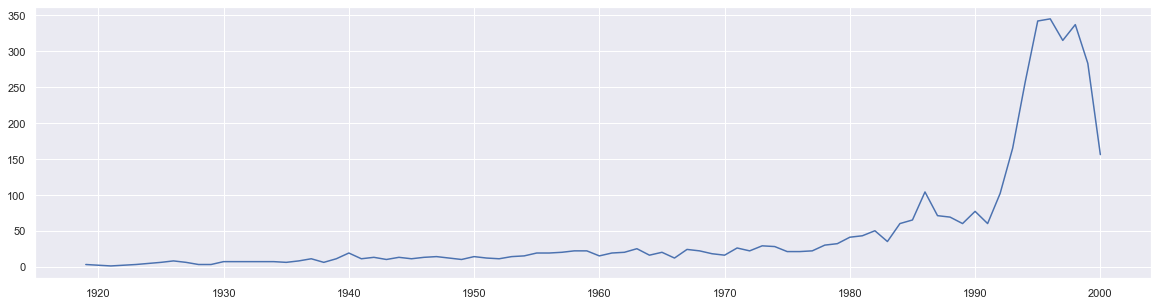

In [100]:
plt.plot(crostab.columns, data)

The plot shows the progression in number of movies for 80 years. This number grow very slowly until 80’s. When the movie production increases. After that, there are an exponential growth in 90’s until some years before 2000, when the movie’s production decrease. 

Now, it is necessary reduce the year for the next plot. 

Reduction will be in decades. Years minor 1920 and 2000 or upper are been ignored

In [22]:
def decades(x):
    if x>=1920 and x<1930:
        decade = 20
    elif x >=1930 and x < 1940:
        decade = 30
    elif x >=1940 and x < 1950:
        decade = 40
    elif x >=1950 and x < 1960:
        decade = 50
    elif x >=1960 and x < 1970:
        decade = 60
    elif x >=1970 and x < 1980:
        decade = 70
    elif x >=1980 and x < 1990:
        decade = 80
    elif x >=1990 and x < 2000:
        decade = 90
    else:
        decade = 0
    return decade




In [23]:
moviesDef['decada']=moviesDef.year3.apply(lambda x: decades(x))
moviesDef.head()

,title(year),year3,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,decada
0,Toy Story (1995),1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,90
1,Jumanji (1995),1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
2,Grumpier Old Men (1995),1995,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,90
3,Waiting to Exhale (1995),1995,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,90
4,Father of the Bride Part II (1995),1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,90


In [32]:
moviesDef.iloc[:,2:]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,decada
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,90
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,90
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,90
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,90
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Realizamos un heatmap para ver los cambios que se producen a lo largo de las decadas
cros_genre_decade = pd.crosstab(moviesDef['decada'],moviesDef.iloc[:,2])
cros_genre_decade 
sns.heatmap(moviesDef)

#days_sex2= pd.crosstab(tips['sex'], tips['day'])
#sns.heatmap(data=days_sex2)
#plt.title('Heatmap of days and sex')
#plt.show()

Action,0,1
decada,,
0,139,20
20,33,1
30,74,3
40,124,2
50,158,10
60,174,17
70,206,41
80,488,110
90,1984,299


In [35]:
moviesDef.iloc[:,2:].value_counts()

Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  decada
0       0          0          0           0       0      0            1      0        0          0       0        0        0        0       0         0    0        90        549
                                          1       0      0            0      0        0          0       0        0        0        0       0         0    0        90        325
                                                                      1      0        0          0       0        0        0        0       0         0    0        90        112
                                          0       0      0            1      0        0          0       0        0        1        0       0         0    0        90        105
                                          1       0      0            0      0        0          0       0        0  

In [150]:
import plotly.graph_objects as go


ModuleNotFoundError: No module named 'plotly'

In [19]:
?sns.heatmap

In [ ]:
Pensar fer spiderchat grafic per a joc d'anys per compararlos

In [151]:
system("jupyter" "notebook" "list")

['Currently running servers:',
 'http://localhost:8888/?token=6db4dddeeef9047553ca83a6d52b0acb3c308eaf44cac8e7 :: C:\\Users\\Guillermo']